In [41]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [42]:
def erosion(image, structuringElement):
    erodedImage = image.copy()
    structuringElement = structuringElement * 255
    offset = structuringElement.shape[0] // 2
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            fit = True

            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if ((i + x) >= 0 and (i + x) < height and (j + y) >= 0 and (j + y) < width):
                        sx, sy = x + offset, y + offset

                        if (structuringElement[x, y] and image[i + x, j + y] != structuringElement[sx, sy]):
                            fit = False
            erodedImage[i, j] = 255 if fit else 0
    
    return np.uint8(erodedImage)

In [43]:
def dilation(image, structuringElement):
    dilatedImage = image.copy()
    structuringElement = structuringElement * 255
    offset = structuringElement.shape[0] // 2
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            hit = False

            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if ((i + x) >= 0 and (i + x) < height and (j + y) >= 0 and (j + y) < width):
                        sx, sy = x + offset, y + offset

                        if (structuringElement[x, y] and image[i + x, j + y] == structuringElement[sx, sy]):
                            hit = True
            dilatedImage[i, j] = 255 if hit else 0
    
    return np.uint8(dilatedImage)

In [44]:
originalImage = cv2.imread("../photos/Noisy Fingerprint 315x238.tif", cv2.IMREAD_GRAYSCALE)
#originalImage = cv2.resize(originalImage, (512, 512))

In [45]:
# creating structing element for erosion and dilation
structuringElementSize = 3
structuringElement = np.ones((structuringElementSize, structuringElementSize))

In [46]:
def plotImage(row, col, index, image, title):
    plt.subplot(row, col, index)
    # Display the magnitude or real part of the complex image
    if np.iscomplexobj(image):
        plt.imshow(np.abs(image), cmap='gray')  # Display magnitude
    else:
        plt.imshow(image, cmap='gray')  # Display real part
    plt.title(title)

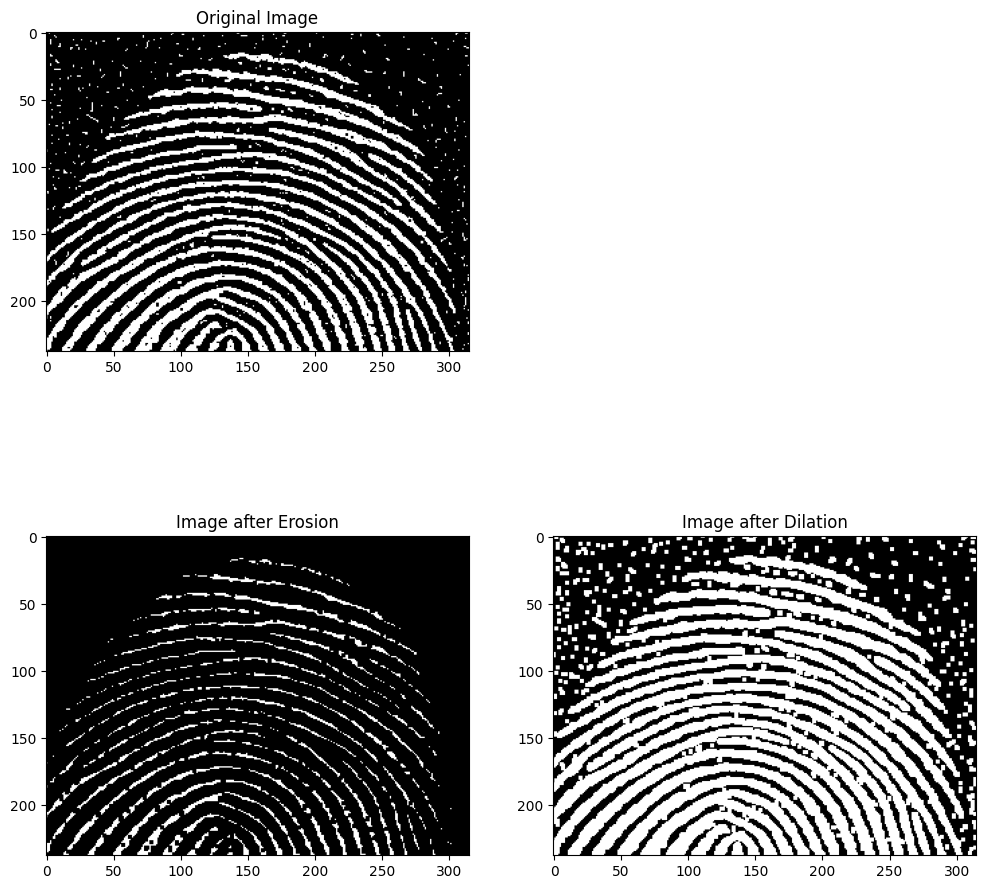

In [50]:
plt.figure(figsize=(12, 12))

plotImage(2, 2, 1, originalImage, "Original Image")

erodedImage = erosion(originalImage, structuringElement)
plotImage(2, 2, 3, erodedImage, "Image after Erosion")

dilatedImage = dilation(originalImage, structuringElement)
plotImage(2, 2, 4, dilatedImage, "Image after Dilation")
